### 저장한 모델을 로드해 과일 분류

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import cv2

from PIL import Image

from torchvision import transforms
from torchvision.transforms import v2

import pandas as pd
import os

import matplotlib.pyplot as plt

In [3]:
# 저장 경로
SAVE_PATH = '../../LocalData/self_project/models/'

# 모델 구조 및 파라미터 저장 파일명
SAVE_MODEL = SAVE_PATH+'loss_0.039_score0.986.pth'

#### 모델 로딩

In [4]:
div_Model = torch.load(SAVE_MODEL, weights_only= False, map_location=torch.device('cpu'))
# GPU에서 생성한 모델 => 모델 로드 시 map_location=torch.device('cpu')

In [5]:
summary(div_Model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            (9,408)
├─BatchNorm2d: 1-2                       (128)
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  (4,096)
│    │    └─BatchNorm2d: 3-2             (128)
│    │    └─Conv2d: 3-3                  (36,864)
│    │    └─BatchNorm2d: 3-4             (128)
│    │    └─Conv2d: 3-5                  (16,384)
│    │    └─BatchNorm2d: 3-6             (512)
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              (16,896)
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  (16,384)
│    │    └─BatchNorm2d: 3-10            (128)
│    │    └─Conv2d: 3-11                 (36,864)
│    │    └─BatchNorm2d: 3-12            (128)
│    │    └─C

In [6]:
transform = transforms.Compose([transforms.Resize([256]), transforms.CenterCrop(224),transforms.ToTensor(),
                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [7]:
target = ['apple', 'banana', 'beetroot', 'bell_pepper', 'cabbage', 'carrot', 'cauliflower', 'chilli_pepper', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'radish', 'spinach', 'sweetpotato', 'tomato', 'watermelon']

In [8]:
img1 = '../../LocalData/self_project/test_image/eggplant.png'


In [9]:
image1 = Image.open(img1).convert('RGB')


In [12]:
pil_image1 = transform(image1).unsqueeze(0)


In [13]:
pil_image1.shape


torch.Size([1, 3, 224, 224])

In [14]:
# 모델 테스트
div_Model.eval()
result = div_Model(pil_image1)

In [15]:
result

tensor([[-23.6556, -12.0490, -11.1590, -13.8132, -20.8014, -13.9302, -15.7126,
          -6.5996, -10.3125,   4.7098, -17.6699, -12.1646, -22.0098, -22.0412,
         -22.0970, -11.6435, -18.5677, -15.1498, -16.7920, -20.2664, -14.0401,
         -18.3316, -22.4797, -14.7582,  -8.9581, -14.6645,  -8.8626, -21.0028,
         -17.4410]], grad_fn=<AddmmBackward0>)

In [16]:
idx = result.argmax().item()
idx

9

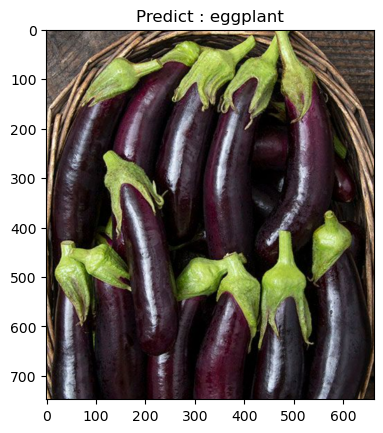

In [17]:
plt.imshow(image1)
plt.title(f'Predict : {target[idx]}')
plt.show()